In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\glass.csv")

In [27]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [28]:
df.describe

<bound method NDFrame.describe of           RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]>

In [29]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

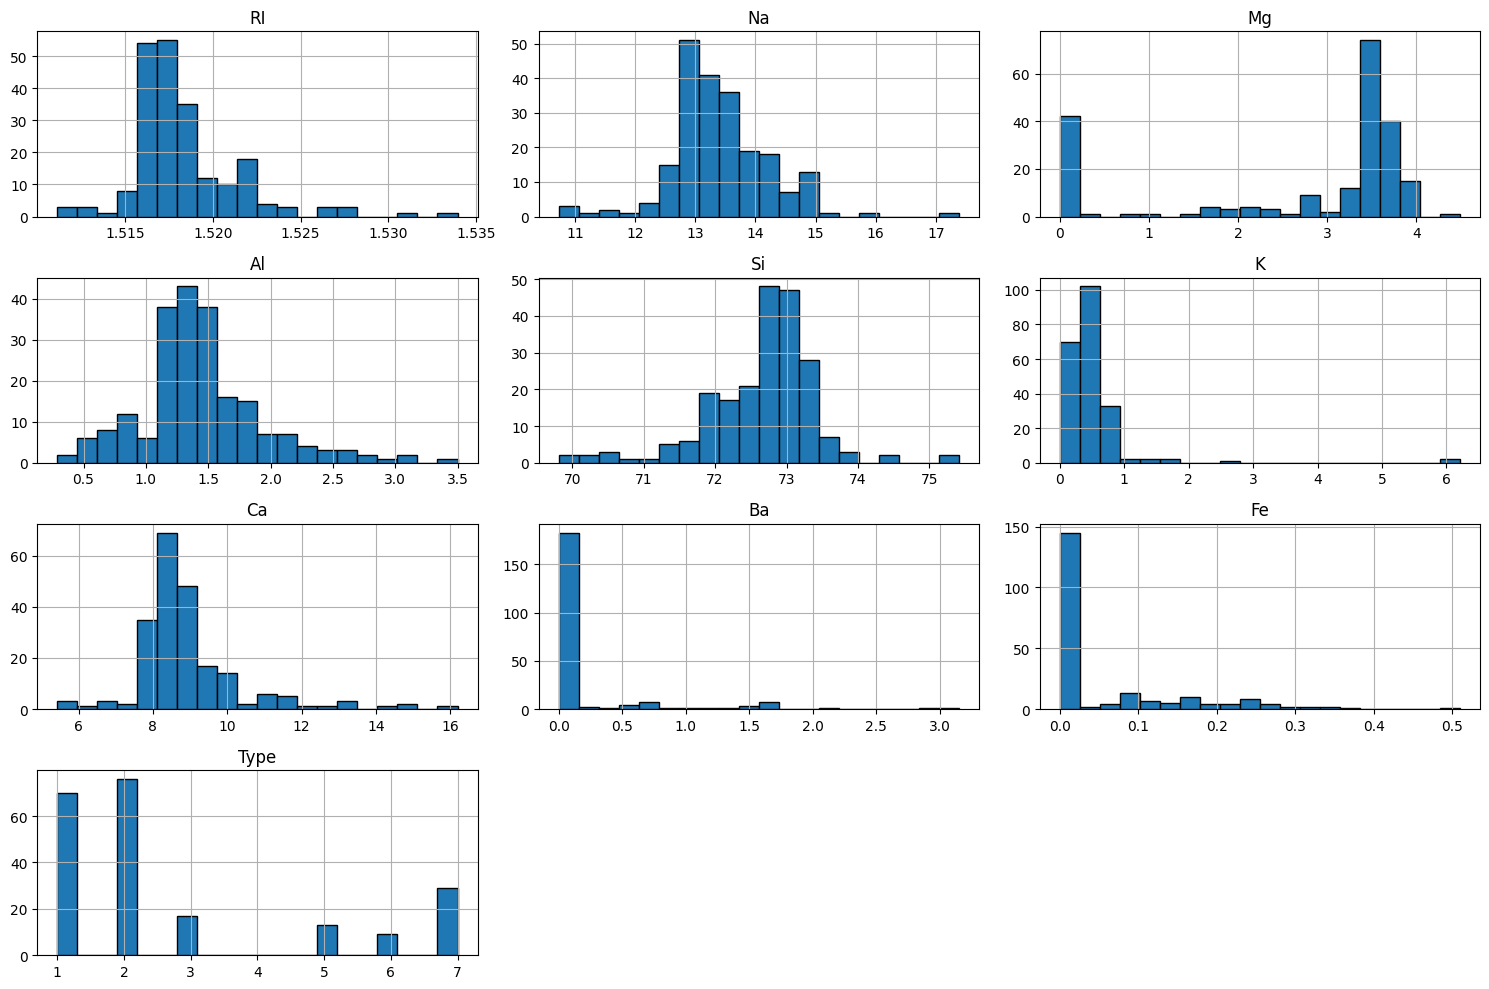

In [30]:
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

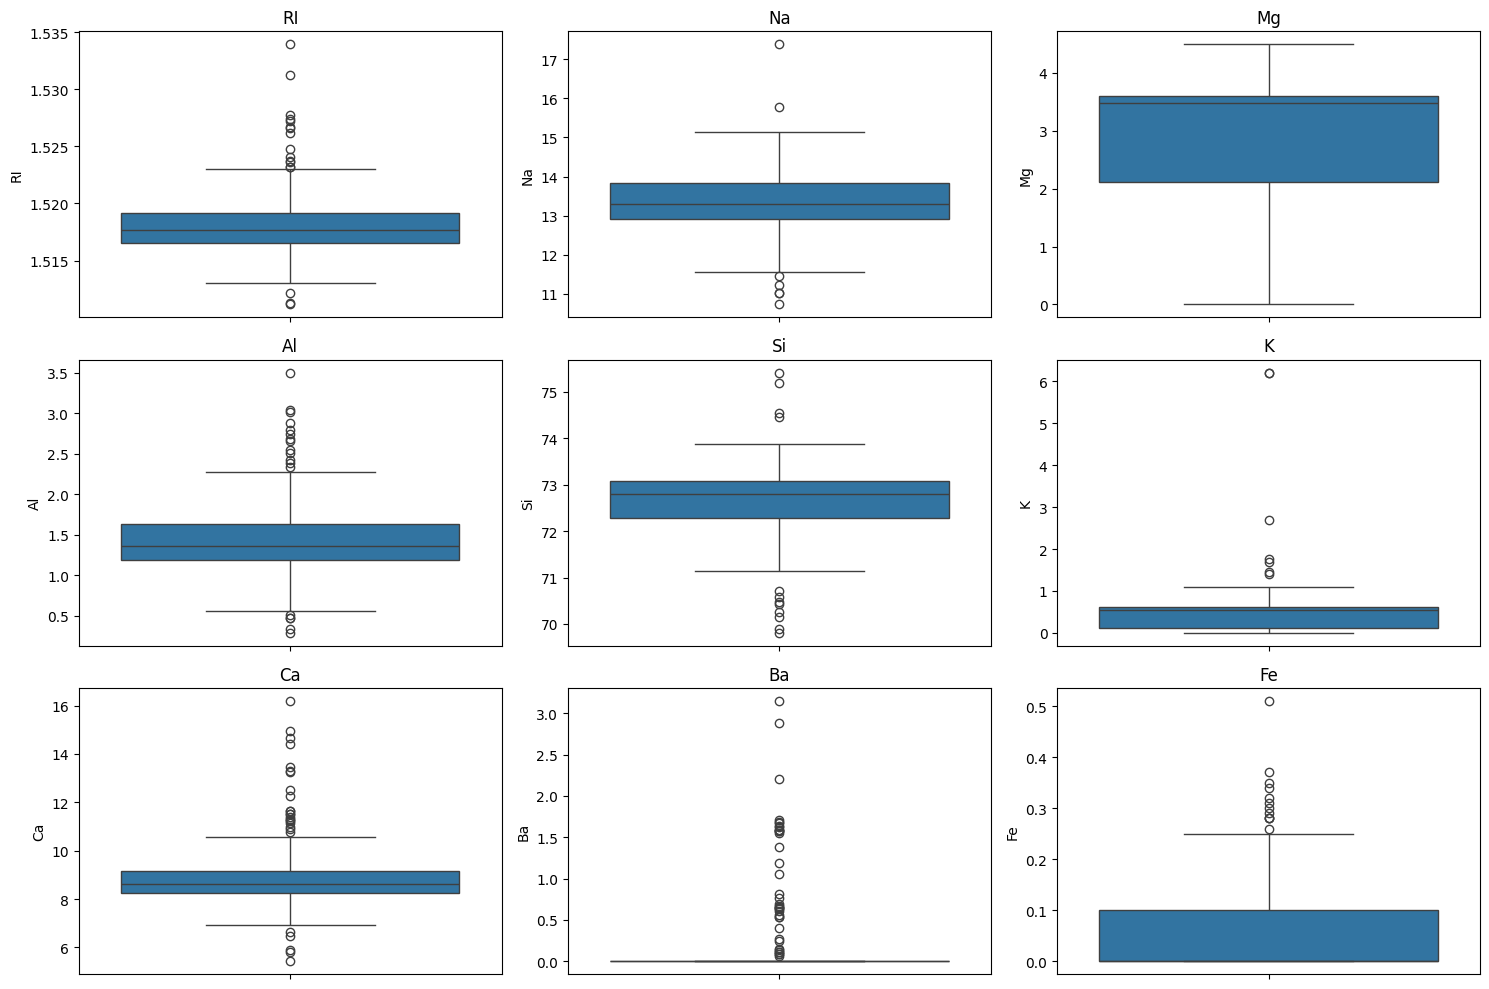

In [31]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):  # Exclude the 'Type' column
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

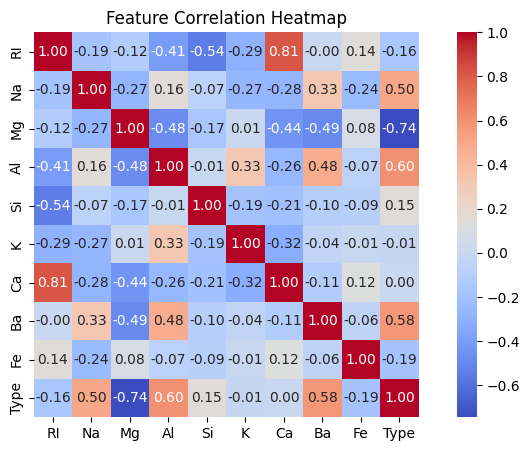

In [32]:
plt.figure(figsize=(10, 5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [33]:
print(df.dtypes)

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


In [34]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Type'])  
y = df['Type']  


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Features after scaling:")
print(X_scaled.head())


Features after scaling:
         RI        Na        Mg        Al        Si         K        Ca  \
0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   

         Ba        Fe  
0 -0.352877 -0.586451  
1 -0.352877 -0.586451  
2 -0.352877 -0.586451  
3 -0.352877 -0.586451  
4 -0.352877 -0.586451  


In [35]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Class distribution before SMOTE:")
print(Counter(y))

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


print("\nClass distribution after SMOTE:")
print(Counter(y_resampled))


Class distribution before SMOTE:
Counter({2: 76, 1: 70, 7: 29, 3: 17, 5: 13, 6: 9})

Class distribution after SMOTE:
Counter({1: 76, 2: 76, 3: 76, 5: 76, 6: 76, 7: 76})


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print("Shape of training set:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)

print("\nShape of testing set:")
print("X_test:", X_test.shape, "y_test:", y_test.shape)


Shape of training set:
X_train: (364, 9) y_train: (364,)

Shape of testing set:
X_test: (92, 9) y_test: (92,)


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


In [39]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Model Evaluation Metrics:
Accuracy: 0.91
Precision: 0.92
Recall: 0.91
F1-Score: 0.91

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.87      0.81        15
           2       0.93      0.87      0.90        15
           3       0.93      0.87      0.90        15
           5       0.94      0.94      0.94        16
           6       1.00      1.00      1.00        16
           7       0.93      0.93      0.93        15

    accuracy                           0.91        92
   macro avg       0.92      0.91      0.91        92
weighted avg       0.92      0.91      0.91        92


Confusion Matrix:
[[13  1  1  0  0  0]
 [ 2 13  0  0  0  0]
 [ 2  0 13  0  0  0]
 [ 0  0  0 15  0  1]
 [ 0  0  0  0 16  0]
 [ 0  0  0  1  0 14]]


In [48]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),  
    n_estimators=100,  
    random_state=42
)


bagging_model.fit(X_train, y_train)


y_pred_bagging = bagging_model.predict(X_test)


accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print("\nBagging Classifier Metrics:")
print(f"Accuracy: {accuracy_bagging:.2f}")
print(f"Precision: {precision_bagging:.2f}")
print(f"Recall: {recall_bagging:.2f}")
print(f"F1-Score: {f1_bagging:.2f}")



Bagging Classifier Metrics:
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1-Score: 0.89


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

boosting_model = AdaBoostClassifier(
    n_estimators=100,  
    random_state=42
)


boosting_model.fit(X_train, y_train)


y_pred_boosting = boosting_model.predict(X_test)


accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')


accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')


results = {
    "Model": ["Random Forest", "Bagging", "Boosting"],
    "Accuracy": [accuracy, accuracy_bagging, accuracy_boosting],
    "Precision": [precision, precision_bagging, precision_boosting],
    "Recall": [recall, recall_bagging, recall_boosting],
    "F1-Score": [f1, f1_bagging, f1_boosting]
}


results_df = pd.DataFrame(results)
print("\nComparison of Model Performance:")
print(results_df)



Comparison of Model Performance:
           Model  Accuracy  Precision    Recall  F1-Score
0  Random Forest  0.913043   0.916606  0.913043  0.913957
1        Bagging  0.891304   0.891317  0.891304  0.890367
2       Boosting  0.510870   0.524850  0.510870  0.493898
